In [1]:
#import libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Question-1

##### Learn a model which can classify given data correctly. This is a multiclass data imbalance problem with high dimensions data. You can see the classes are named as n, p1, p2, p3,...So the classes as n are negative ones and with p in it as positive.

In [2]:
#importing the data
data = pd.read_csv('train.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-6.190000e-06,-0.000037,0.000070,-2.560000e-05,-0.000041,-0.000116,0.027253,0.027290,0.027220,0.017966,...,-0.69694,1.6505,3.7807,-1.5016,-1.5017,-1.5016,-1.4939,-1.4939,-1.4940,p4
1,-5.080000e-07,-0.000008,-0.000010,-2.900000e-06,-0.000001,0.000046,0.031973,0.031981,0.031992,-0.036266,...,-0.49315,9.1182,15.4610,-1.4980,-1.4980,-1.4980,-1.4978,-1.4978,-1.4978,n
2,2.950000e-06,0.000036,0.000004,1.580000e-05,0.000098,-0.000337,0.010780,0.010744,0.010740,-0.018368,...,-0.68272,1.8947,5.9028,-1.4970,-1.4971,-1.4972,-1.5038,-1.5039,-1.5036,p5
3,-1.680000e-05,0.000026,0.000518,1.550000e-05,0.000072,0.000032,-0.037939,-0.037965,-0.038483,-0.030257,...,-0.71862,1.9076,5.5017,-1.4962,-1.4963,-1.4960,-1.5020,-1.5021,-1.5017,p1
4,1.610000e-06,0.000018,-0.000156,-9.650000e-07,0.000009,0.000036,0.010411,0.010393,0.010549,-0.014548,...,-0.71715,1.0778,4.9960,-1.5042,-1.5042,-1.5041,-1.4911,-1.4911,-1.4915,p5


In [3]:
# describing the data
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
count,8507.000000,8507.000000,8507.000000,8.507000e+03,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,...,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000
mean,-0.000001,0.000007,0.000015,-8.104282e-07,0.000010,0.000011,0.015471,0.015463,0.015448,-0.016507,...,8.297015,-0.635826,7.031227,8.142438,-1.501420,-1.501451,-1.501339,-1.497626,-1.497649,-1.497529
std,0.000064,0.000069,0.000230,8.580479e-06,0.000038,0.000217,0.015712,0.015715,0.015722,0.027911,...,6.660245,1.607126,11.689025,6.417985,0.003717,0.003720,0.003670,0.002998,0.002996,0.003015
min,-0.000678,-0.002163,-0.002209,-4.170000e-05,-0.000260,-0.001626,-0.055309,-0.055316,-0.055328,-0.061243,...,0.712110,-0.891000,-0.535610,0.606140,-1.512400,-1.512400,-1.511800,-1.510400,-1.510400,-1.510500
25%,-0.000006,-0.000007,-0.000065,-5.435000e-06,-0.000006,-0.000065,0.012665,0.012656,0.012658,-0.035379,...,4.409750,-0.717045,1.500250,4.322250,-1.504100,-1.504100,-1.504000,-1.499400,-1.499400,-1.499300
50%,-0.000002,0.000004,0.000003,-1.740000e-06,0.000004,0.000002,0.019684,0.019680,0.019674,-0.028206,...,6.496200,-0.668240,3.235400,6.343600,-1.500800,-1.500800,-1.500700,-1.497900,-1.497900,-1.497800
75%,0.000002,0.000026,0.000089,3.790000e-06,0.000029,0.000078,0.025535,0.025531,0.025518,0.004998,...,9.822150,-0.578400,7.891750,9.731400,-1.498500,-1.498500,-1.498500,-1.496100,-1.496100,-1.496000
max,0.005784,0.004525,0.003330,7.080000e-05,0.000348,0.001982,0.046324,0.046319,0.046329,0.071934,...,89.372000,146.340000,145.860000,98.758000,-1.458500,-1.466200,-1.472600,-1.488400,-1.488400,-1.486800


In [4]:
# number of samples and count of each samples
print(f"No. of samples                    :{len(data)}")
print(f"No.of samples with label 'n'      :{len(data[data.iloc[:,48]=='n'])}")
print(f"No.of samples with label 'p1'     :{len(data[data.iloc[:,48]=='p1'])}")
print(f"No.of samples with label 'p2'     :{len(data[data.iloc[:,48]=='p2'])}")
print(f"No.of samples with label 'p3'     :{len(data[data.iloc[:,48]=='p3'])}")
print(f"No.of samples with label 'p4'     :{len(data[data.iloc[:,48]=='p4'])}")
print(f"No.of samples with label 'p5'     :{len(data[data.iloc[:,48]=='p5'])}")

No. of samples                    :8507
No.of samples with label 'n'      :4268
No.of samples with label 'p1'     :853
No.of samples with label 'p2'     :413
No.of samples with label 'p3'     :651
No.of samples with label 'p4'     :1253
No.of samples with label 'p5'     :1069


In [5]:
# dataset is highly imbalanced, so split the data into positive and negative
# all 'pi' labels as positive(1) and all 'n' label as negative(0)
# do binary classification with this dataset
# then split all positive labels in to p1, p2, p3, p4, and p5
# do multilabel classification with this data

###### Data Prepration

In [6]:
#data split into positive and negative labels
data_binary = data.copy()

for i in range(len(data)):
    if data_binary.iloc[i,-1] == 'n':
        data_binary.iloc[i,-1] = 0                 #put n label as 0 and others as 1
    else:
        data_binary.iloc[i,-1] = 1

data_binary.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-6.190000e-06,-0.000037,0.000070,-2.560000e-05,-0.000041,-0.000116,0.027253,0.027290,0.027220,0.017966,...,-0.69694,1.6505,3.7807,-1.5016,-1.5017,-1.5016,-1.4939,-1.4939,-1.4940,1
1,-5.080000e-07,-0.000008,-0.000010,-2.900000e-06,-0.000001,0.000046,0.031973,0.031981,0.031992,-0.036266,...,-0.49315,9.1182,15.4610,-1.4980,-1.4980,-1.4980,-1.4978,-1.4978,-1.4978,0
2,2.950000e-06,0.000036,0.000004,1.580000e-05,0.000098,-0.000337,0.010780,0.010744,0.010740,-0.018368,...,-0.68272,1.8947,5.9028,-1.4970,-1.4971,-1.4972,-1.5038,-1.5039,-1.5036,1
3,-1.680000e-05,0.000026,0.000518,1.550000e-05,0.000072,0.000032,-0.037939,-0.037965,-0.038483,-0.030257,...,-0.71862,1.9076,5.5017,-1.4962,-1.4963,-1.4960,-1.5020,-1.5021,-1.5017,1
4,1.610000e-06,0.000018,-0.000156,-9.650000e-07,0.000009,0.000036,0.010411,0.010393,0.010549,-0.014548,...,-0.71715,1.0778,4.9960,-1.5042,-1.5042,-1.5041,-1.4911,-1.4911,-1.4915,1


In [7]:
# data for multi class classification
# retrieve only positive labels
# encode the labels p1=1, p2=2, p3=3, p4=4, p5=5 
data_multi = data[data.iloc[:,-1]!= 'n']       

for i in range(len(data_multi)):
    if data_multi.iloc[i,-1] == 'p1':
        data_multi.iloc[i,-1] = 1
    elif data_multi.iloc[i,-1] == 'p2':
        data_multi.iloc[i,-1] = 2
    elif data_multi.iloc[i,-1] == 'p3':
        data_multi.iloc[i,-1] = 3
    elif data_multi.iloc[i,-1] == 'p4':
        data_multi.iloc[i,-1] = 4
    elif data_multi.iloc[i,-1] == 'p5':
        data_multi.iloc[i,-1] = 5

data_multi.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-0.000006,-0.000037,0.000070,-2.560000e-05,-0.000041,-0.000116,0.027253,0.027290,0.027220,0.017966,...,-0.69694,1.6505,3.7807,-1.5016,-1.5017,-1.5016,-1.4939,-1.4939,-1.4940,4
2,0.000003,0.000036,0.000004,1.580000e-05,0.000098,-0.000337,0.010780,0.010744,0.010740,-0.018368,...,-0.68272,1.8947,5.9028,-1.4970,-1.4971,-1.4972,-1.5038,-1.5039,-1.5036,5
3,-0.000017,0.000026,0.000518,1.550000e-05,0.000072,0.000032,-0.037939,-0.037965,-0.038483,-0.030257,...,-0.71862,1.9076,5.5017,-1.4962,-1.4963,-1.4960,-1.5020,-1.5021,-1.5017,1
4,0.000002,0.000018,-0.000156,-9.650000e-07,0.000009,0.000036,0.010411,0.010393,0.010549,-0.014548,...,-0.71715,1.0778,4.9960,-1.5042,-1.5042,-1.5041,-1.4911,-1.4911,-1.4915,5
8,-0.000002,-0.000016,0.000046,-1.330000e-06,0.000008,-0.000092,0.011017,0.011033,0.010987,0.019514,...,-0.68758,11.5330,30.4150,-1.4991,-1.4992,-1.4993,-1.4986,-1.4986,-1.4984,2


#### Binary Classification

###### Feature Selection

In [8]:
# Do descision tree classification with positive and negative data in default arguments
# find feature importance and select important features

X = data_binary.iloc[:,:-1]
y = data_binary.iloc[:,-1].astype(int)

#fit the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y) 

# get feature importance
importance = clf.feature_importances_              

Feature: 0, Score: 0.00038
Feature: 1, Score: 0.00043
Feature: 2, Score: 0.00031
Feature: 3, Score: 0.00002
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.32385
Feature: 7, Score: 0.01785
Feature: 8, Score: 0.00150
Feature: 9, Score: 0.00504
Feature: 10, Score: 0.00071
Feature: 11, Score: 0.44082
Feature: 12, Score: 0.02898
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00132
Feature: 15, Score: 0.06647
Feature: 16, Score: 0.01956
Feature: 17, Score: 0.00084
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.01366
Feature: 20, Score: 0.00258
Feature: 21, Score: 0.00186
Feature: 22, Score: 0.00344
Feature: 23, Score: 0.02810
Feature: 24, Score: 0.00035
Feature: 25, Score: 0.00046
Feature: 26, Score: 0.00003
Feature: 27, Score: 0.00045
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00090
Feature: 30, Score: 0.00047
Feature: 31, Score: 0.00555
Feature: 32, Score: 0.00167
Feature: 33, Score: 0.00155
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.01129
Fe

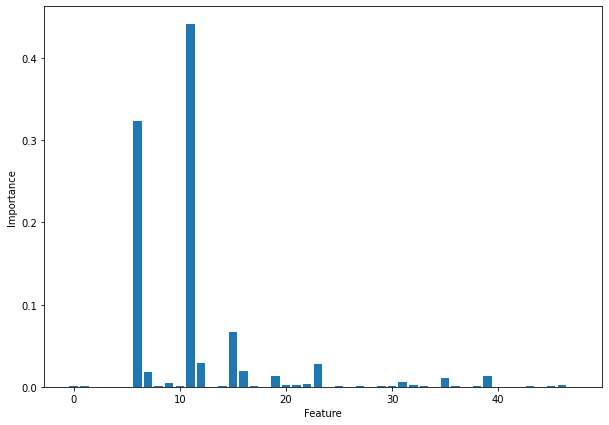

In [9]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.figure(figsize=(10,7))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [36]:
#select the important features, i.e importance greater than 0.01
data_binary_new = data_binary.iloc[:, [6,11,12,15,22,35,39,48]]

###### Hyper parameter tuning

In [37]:
#define x and y
X = data_binary_new.iloc[:,:-1]
y = data_binary_new.iloc[:,-1].astype(int)

#split the data in to tran and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#parameters for tuning
params = {
    "n_estimators":list(range(60,101,10)), 
    "criterion":("gini", "entropy"), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1,5)), 
}

# hyper-parameter tuning with gridsearch cv
clf = RandomForestClassifier(random_state=42)
tree_cv = GridSearchCV(clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)

#get best parameters and print it
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best paramters: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 80})


###### Training the model with best parameters

In [38]:
#train the random forest classifier model with best parameter
clf_binary = RandomForestClassifier(**best_params)
clf_binary.fit(X_train, y_train)
print('Training Completed!!')

Training Completed!!


###### Testing the model

In [13]:
#train results computing
pred = clf_binary.predict(X_train)
clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3005.0  2949.0       1.0     5954.0        5954.0
_______________________________________________
Confusion Matrix: 
 [[3005    0]
 [   0 2949]]



In [14]:
#test result computing
pred = clf_binary.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
print("Test Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Test Result:
Accuracy Score: 99.76%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.999206     0.996136   0.99765     0.997671      0.997655
recall        0.996041     0.999225   0.99765     0.997633      0.997650
f1-score      0.997621     0.997678   0.99765     0.997649      0.997650
support    1263.000000  1290.000000   0.99765  2553.000000   2553.000000
_______________________________________________
Confusion Matrix: 
 [[1258    5]
 [   1 1289]]



#### Multi Class Classification

###### Feature Selection

In [15]:
# Do descision tree classification with positive labels in default arguments
# find feature importance and select important features

X = data_multi.iloc[:,:-1]
y = data_multi.iloc[:,-1].astype(int)

#fit the data with descision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)   

# get feature importance
importance = clf.feature_importances_              

Feature: 0, Score: 0.00090
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00030
Feature: 3, Score: 0.00167
Feature: 4, Score: 0.00098
Feature: 5, Score: 0.00012
Feature: 6, Score: 0.39997
Feature: 7, Score: 0.00276
Feature: 8, Score: 0.01669
Feature: 9, Score: 0.00139
Feature: 10, Score: 0.48978
Feature: 11, Score: 0.00049
Feature: 12, Score: 0.00201
Feature: 13, Score: 0.00103
Feature: 14, Score: 0.00060
Feature: 15, Score: 0.00979
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00030
Feature: 22, Score: 0.01534
Feature: 23, Score: 0.01004
Feature: 24, Score: 0.03991
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00138
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00060
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00059
Feature: 35, Score: 0.00000
Fe

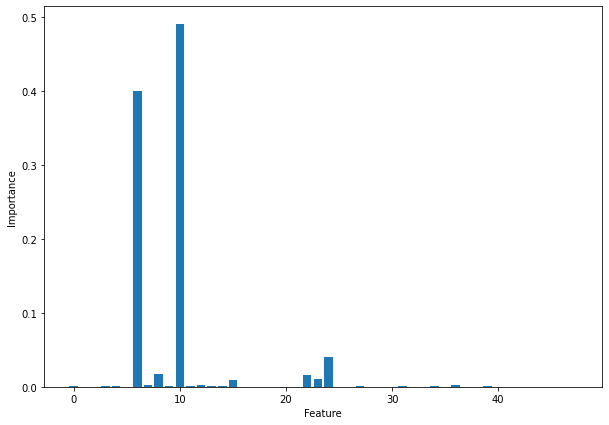

In [16]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.figure(figsize=(10,7))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [17]:
#select important features, i.e importance greater than 0.01
data_multi_new = data_multi.iloc[:, [6,8,9,10,22,23,24,48]]

###### Hyper parameter tuning

In [18]:
#define x and y
X = data_multi_new.iloc[:,:-1]
y = data_multi_new.iloc[:,-1].astype(int)

#split the data in to tran and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#parameters for tuning
params = {
    "n_estimators":list(range(60,101,10)), 
    "criterion":("gini", "entropy"), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1,5)), 
}

# hyper-parameter tuning with grid search cv
clf = RandomForestClassifier(random_state=42)
tree_cv = GridSearchCV(clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)

#get best parameters and print 
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best paramters: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80})


###### Train the model with best parameters

In [19]:
#train with random forest classifier using best parameters
clf_multi = RandomForestClassifier(**best_params)
clf_multi.fit(X_train, y_train)
print('Training Completed!!')

Training Completed!!


###### Testing the model

In [20]:
#train results
pred = clf_multi.predict(X_train)
clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               1      2      3      4      5  accuracy  macro avg  \
precision    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
recall       1.0    1.0    1.0    1.0    1.0       1.0        1.0   
f1-score     1.0    1.0    1.0    1.0    1.0       1.0        1.0   
support    602.0  285.0  448.0  898.0  734.0       1.0     2967.0   

           weighted avg  
precision           1.0  
recall              1.0  
f1-score            1.0  
support          2967.0  
_______________________________________________
Confusion Matrix: 
 [[602   0   0   0   0]
 [  0 285   0   0   0]
 [  0   0 448   0   0]
 [  0   0   0 898   0]
 [  0   0   0   0 734]]



In [21]:
#test results
pred = clf_multi.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
print("Test Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Test Result:
Accuracy Score: 99.45%
_______________________________________________
CLASSIFICATION REPORT:
               1           2           3           4           5  accuracy  \
precision    1.0    1.000000    0.990196    0.988796    0.997024  0.994497   
recall       1.0    0.968750    0.995074    0.994366    1.000000  0.994497   
f1-score     1.0    0.984127    0.992629    0.991573    0.998510  0.994497   
support    251.0  128.000000  203.000000  355.000000  335.000000  0.994497   

             macro avg  weighted avg  
precision     0.995203      0.994525  
recall        0.991638      0.994497  
f1-score      0.993368      0.994482  
support    1272.000000   1272.000000  
_______________________________________________
Confusion Matrix: 
 [[251   0   0   0   0]
 [  0 124   0   3   1]
 [  0   0 202   1   0]
 [  0   0   2 353   0]
 [  0   0   0   0 335]]



#### Prediction

In [32]:
# import test data
test_data = pd.read_csv('test.csv')
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-4.520000e-06,0.000002,0.000134,-0.000017,-0.000002,-0.000003,0.027720,0.027718,0.027584,0.027112,...,3.9797,-0.62393,0.010489,5.6951,-1.5005,-1.5005,-1.5007,-1.4955,-1.4955,-1.4954
1,-3.700000e-07,0.000002,-0.000007,-0.000002,0.000002,0.000001,0.025170,0.025168,0.025175,-0.049183,...,7.9604,-0.55811,9.603400,10.3340,-1.4974,-1.4974,-1.4973,-1.4974,-1.4973,-1.4973
2,-8.680000e-06,-0.000005,-0.000058,-0.000005,0.000010,0.000045,0.027690,0.027695,0.027753,-0.026961,...,8.1376,-0.70769,1.579500,10.5910,-1.4995,-1.4996,-1.4995,-1.4994,-1.4994,-1.4993
3,-3.890000e-06,0.000027,-0.000237,0.000019,0.000015,0.000877,0.018646,0.018619,0.018856,-0.032315,...,4.6469,-0.63897,0.852670,5.3556,-1.5076,-1.5077,-1.5068,-1.4963,-1.4962,-1.4967
4,-3.910000e-07,-0.000003,0.000005,0.000002,0.000009,-0.000012,0.019145,0.019149,0.019143,0.043739,...,9.1222,-0.47616,41.988000,4.0899,-1.4976,-1.4976,-1.4976,-1.4986,-1.4986,-1.4986


In [33]:
# do binary classification each sample at a time, if output is zero update the output in csv as 'n'
# if the output is 1(positive) do multi class classification
# update output in the csv with labels p1, p2, p3, p4 or p5

for i in range(len(test_data)):
    X = np.array(test_data.iloc[i, [6,11,12,15,22,35,39]]).reshape(1,7)
    y1 = clf_binary.predict(X)
    
    if y1 == 0:
        test_data.loc[i,'Class'] = 'n'
    else:
        X = np.array(test_data.iloc[i, [6,8,9,10,22,23,24]]).reshape(1,7)
        y2 = clf_multi.predict(X)
        
        if y2 == 1:
            test_data.loc[i,'Class'] = 'p1'
        elif y2 ==2:
            test_data.loc[i,'Class'] = 'p2'
        elif y2 ==3:
            test_data.loc[i,'Class'] = 'p3'
        elif y2 ==4:
            test_data.loc[i,'Class'] = 'p4'
        elif y2 ==5:
            test_data.loc[i,'Class'] = 'p5'  

In [34]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,Class
0,-4.520000e-06,0.000002,0.000134,-0.000017,-0.000002,-0.000003,0.027720,0.027718,0.027584,0.027112,...,-0.62393,0.010489,5.6951,-1.5005,-1.5005,-1.5007,-1.4955,-1.4955,-1.4954,p4
1,-3.700000e-07,0.000002,-0.000007,-0.000002,0.000002,0.000001,0.025170,0.025168,0.025175,-0.049183,...,-0.55811,9.603400,10.3340,-1.4974,-1.4974,-1.4973,-1.4974,-1.4973,-1.4973,n
2,-8.680000e-06,-0.000005,-0.000058,-0.000005,0.000010,0.000045,0.027690,0.027695,0.027753,-0.026961,...,-0.70769,1.579500,10.5910,-1.4995,-1.4996,-1.4995,-1.4994,-1.4994,-1.4993,n
3,-3.890000e-06,0.000027,-0.000237,0.000019,0.000015,0.000877,0.018646,0.018619,0.018856,-0.032315,...,-0.63897,0.852670,5.3556,-1.5076,-1.5077,-1.5068,-1.4963,-1.4962,-1.4967,n
4,-3.910000e-07,-0.000003,0.000005,0.000002,0.000009,-0.000012,0.019145,0.019149,0.019143,0.043739,...,-0.47616,41.988000,4.0899,-1.4976,-1.4976,-1.4976,-1.4986,-1.4986,-1.4986,p3


In [35]:
test_data.to_csv('prediction_results.csv')                 #save the result to prediction_result.csv file

### Question -2

###### Perform spectral clustering for a given dataset

In [2]:
# import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot as plt

In [4]:
# import data
data = pd.read_csv('spectral.txt', sep=' ')
data.head(5)

,x1,x2
0,-0.519814,0.171443
1,-0.502681,-0.132861
2,-0.426553,-0.260814
3,-0.499372,0.152724
4,-0.278282,-0.286800


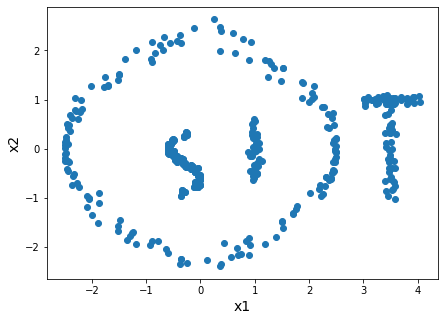

In [4]:
# scatter plot of the data
plt.figure(figsize=(7,5))
plt.scatter(data.loc[:,'x1'], data.loc[:,'x2'])
plt.xlabel('x1', size=14)
plt.ylabel('x2', size=14)
plt.show()

In [24]:
from sklearn.metrics import pairwise_distances
import networkx as nx
import seaborn as sns

W = pairwise_distances(data, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 0.8 else 0)
W = np.vectorize(vectorizer)(W)
print(W)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]]


In [25]:
D = np.diag(np.sum(np.array(W), axis=1))
D

array([[112,   0,   0, ...,   0,   0,   0],
       [  0, 162,   0, ...,   0,   0,   0],
       [  0,   0, 164, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  26,   0,   0],
       [  0,   0,   0, ...,   0,  14,   0],
       [  0,   0,   0, ...,   0,   0,  31]])

In [26]:
L = D - W
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[-4.26325641e-14+0.00000000e+00j  6.23144517e+01+0.00000000e+00j
  1.41173436e+02+0.00000000e+00j  1.58112966e+02+0.00000000e+00j
  1.39251041e+02+0.00000000e+00j  1.62104672e+02+0.00000000e+00j
  1.60144137e+02+0.00000000e+00j  1.58000000e+02+0.00000000e+00j
  1.02120227e+02+0.00000000e+00j  1.40000000e+02+0.00000000e+00j
  1.38000000e+02+0.00000000e+00j  1.27616729e+02+0.00000000e+00j
  1.62000000e+02+0.00000000e+00j  1.62000000e+02+0.00000000e+00j
  1.60000000e+02+0.00000000e+00j  1.60000000e+02+0.00000000e+00j
  1.25306304e+02+0.00000000e+00j  1.02000000e+02+0.00000000e+00j
  1.21732585e+02+0.00000000e+00j  1.06099718e+02+0.00000000e+00j
  1.08771541e+02+0.00000000e+00j  1.26000000e+02+0.00000000e+00j
  1.10143342e+02+0.00000000e+00j  1.13266025e+02+0.00000000e+00j
  1.14407871e+02+0.00000000e+00j  1.17434954e+02+0.00000000e+00j
  1.10000000e+02+0.00000000e+00j  1.10000000e+02+0.00000000e+00j
  1.06000000e+02+0.00000000e+00j  1.06000000e+02+0.00000000e+00j
  1.14000000

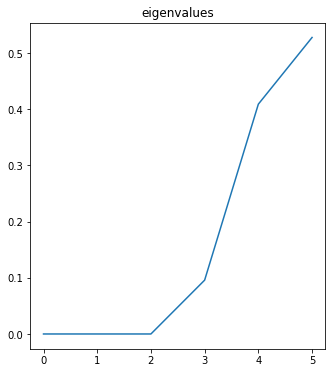

In [27]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.plot(np.sort(e)[:6])
ax1.title.set_text('eigenvalues')

In [28]:
i = np.where(e < 10e-6)[0]
i

array([  0, 164, 242], dtype=int64)

In [ ]:
#Method 2

In [142]:
from sklearn.neighbors import radius_neighbors_graph
from sklearn.neighbors import kneighbors_graph
A = radius_neighbors_graph(data,0.5,mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False)
#A = kneighbors_graph(data, 2, mode='connectivity', metric='minkowski', p=2, metric_params=None, include_self=False)
print(A.todense())


[[0.         0.30478666 0.44220321 ... 0.         0.         0.        ]
 [0.30478666 0.         0.14888686 ... 0.         0.         0.        ]
 [0.44220321 0.14888686 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.34501609]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.34501609 0.         0.        ]]


In [143]:
# degree matrix
D = np.diag(np.sum(np.array(A.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - A
print('laplacian matrix:')
print(L)

degree matrix:
[[18.83213983  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         23.09595552  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         26.66606571 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  4.28802146  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          2.75421156
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   5.7924555 ]]
laplacian matrix:
[[18.83213983 -0.30478666 -0.44220321 ...  0.          0.
   0.        ]
 [-0.30478666 23.09595552 -0.14888686 ...  0.          0.
   0.        ]
 [-0.44220321 -0.14888686 26.66606571 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  4.28802146  0.
  -0.34501609]
 [ 0.          0.          0.         ...  0.          2.75421156
   0.        ]
 [ 0.          0.          0.         ... -0.34501609  0.
   5.7924555 ]]


In [144]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[ 2.13162821e-14  4.11613897e+01  5.98506712e+00  3.95125929e+01
  3.34012797e+01  3.43200043e+01  3.51107885e+01  3.56359252e+01
  3.72107030e+01  3.20876196e+01  3.03862693e+01  3.62846903e+01
  3.71327698e+01  3.70770667e+01  3.62766749e+01  3.62296033e+01
  3.46671406e+01  1.37761234e+01  3.37824495e+01  1.44239382e+01
  1.47757340e+01  3.30820351e+01  1.39906500e+01  1.42901489e+01
  1.47159998e+01  3.19015554e+01  1.64778052e+01  2.94282052e+01
  2.97265826e+01  2.87993148e+01  2.31559326e+01  2.35463374e+01
  2.84221356e+01  2.83326241e+01  2.80246249e+01  2.84704345e+01
  2.78295867e+01  2.83593619e+01  2.81183947e+01  2.45991711e+01
  2.47575395e+01  2.72753911e+01  2.76240890e+01  2.71922956e+01
  2.74271425e+01  2.71337312e+01  2.65184449e+01  2.59105023e+01
  2.51492777e+01  2.62167362e+01  2.55477012e+01  2.71938278e+01
  2.71262953e+01  2.66660657e+01  2.66266886e+01  2.53002153e+01
  2.54167394e+01  2.61738719e+01  1.66097392e+01  1.77177251e+01
  2.60835948

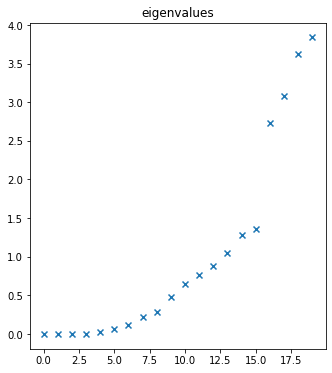

In [19]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.scatter(list(np.arange(len(e))[:20]),np.sort(e)[:20], marker = 'x')
ax1.title.set_text('eigenvalues')

In [29]:
i = np.where(e < 10e-6)[0]
i

array([  0, 164, 242], dtype=int64)

In [31]:
v1 = v[:, i[0]]
v2 = v[:, i[1]]
v3 = v[:, i[2]]
#v4 = v[:, i[3]]
#V = np.hstack((v1.reshape(-1,1),v2.reshape(-1,1),v2.reshape(-1,1),v4.reshape(-1,1)))
#V.shape

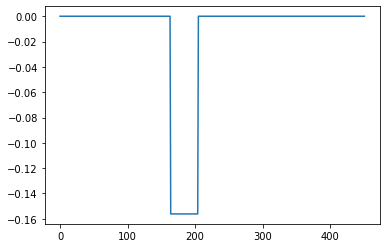

In [32]:
plt.plot(v2)

In [152]:
from sklearn.cluster import SpectralClustering, KMeans
km = KMeans(init='k-means++', n_clusters=4)
km.fit(V)
labels = km.labels_

In [153]:
data.shape, labels.shape

((452, 2), (452,))

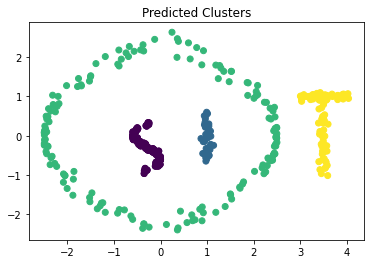

In [154]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=labels)
plt.title('Predicted Clusters')
plt.show()

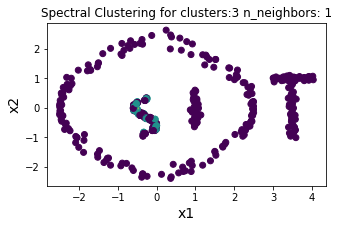

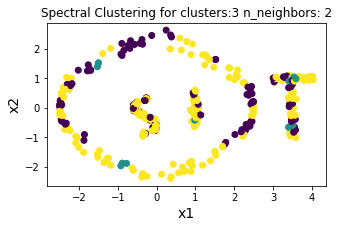

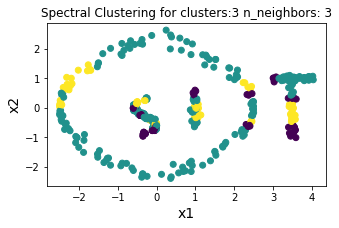

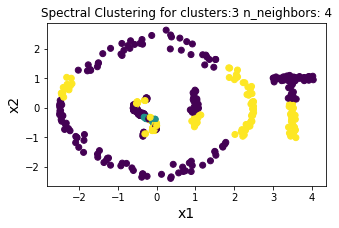

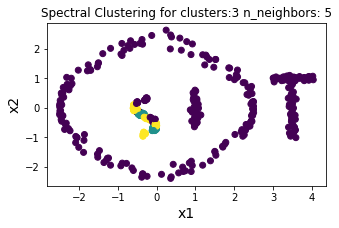

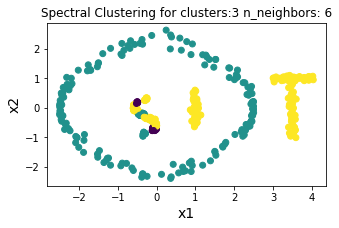

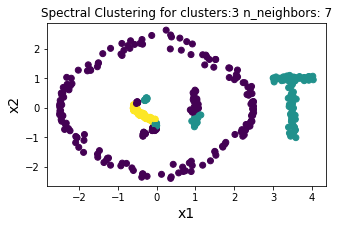

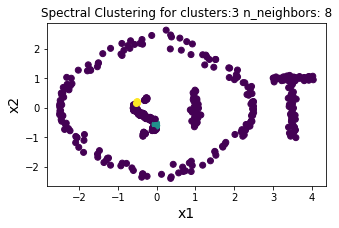

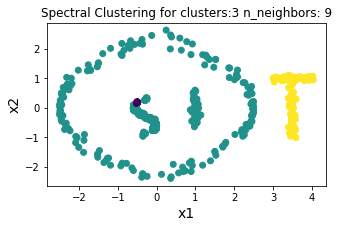

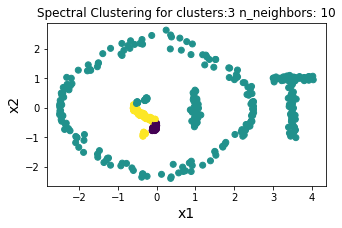

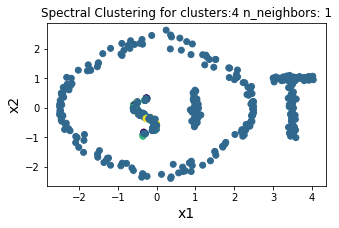

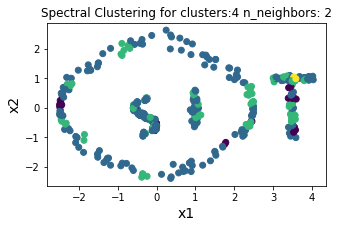

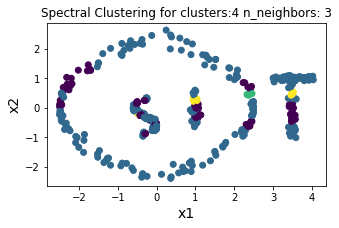

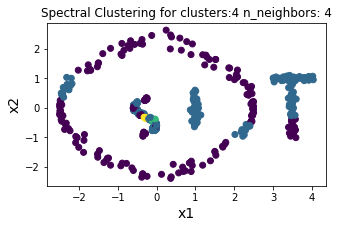

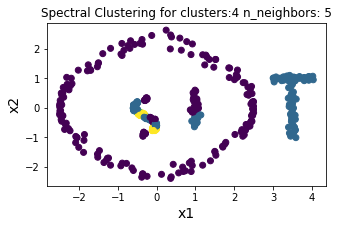

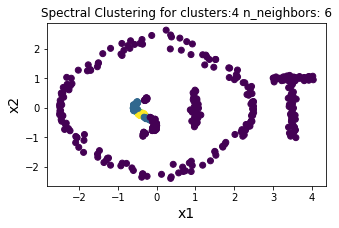

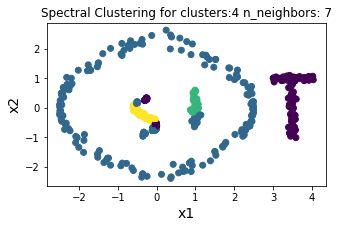

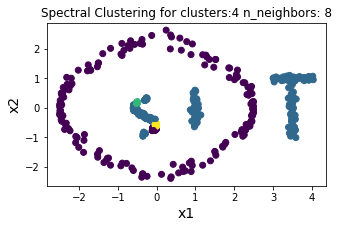

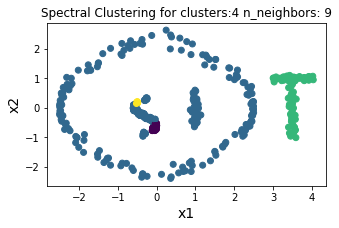

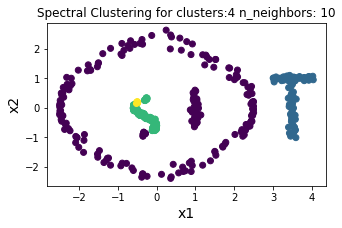

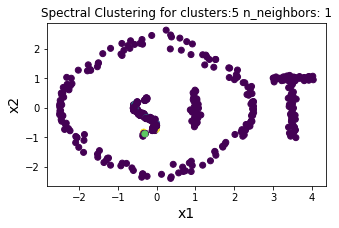

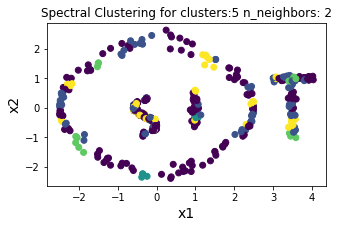

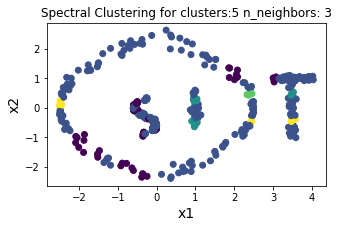

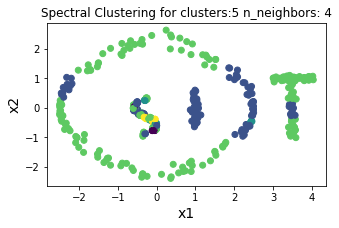

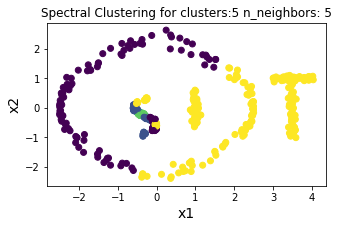

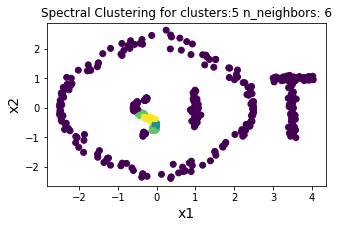

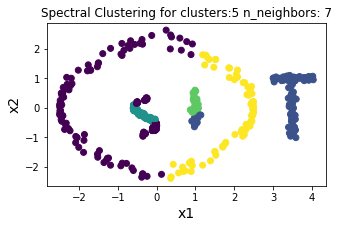

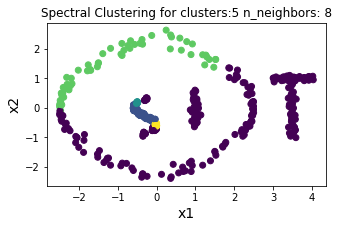

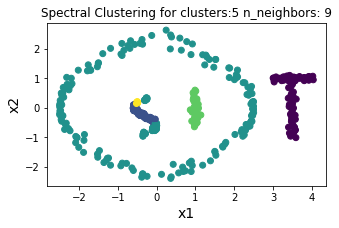

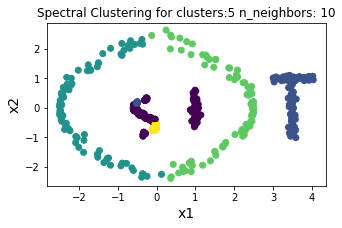

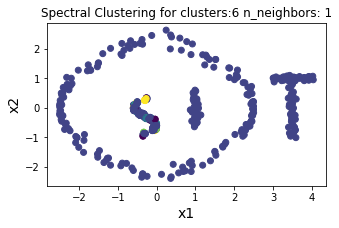

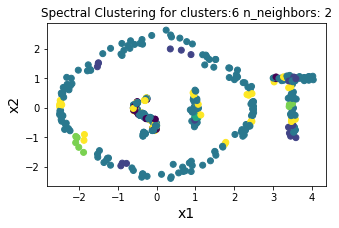

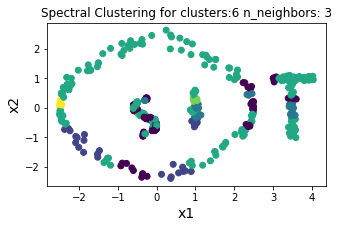

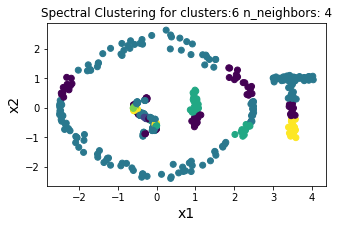

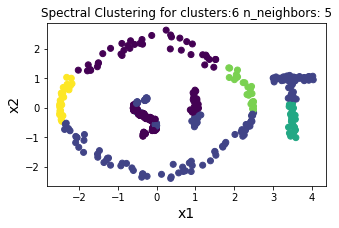

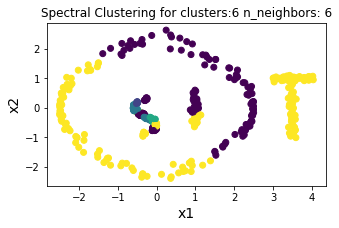

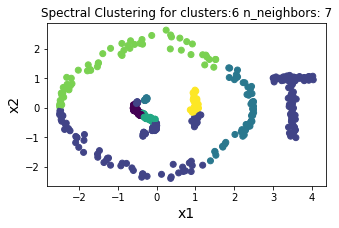

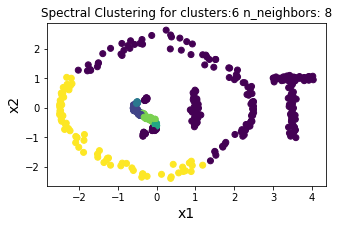

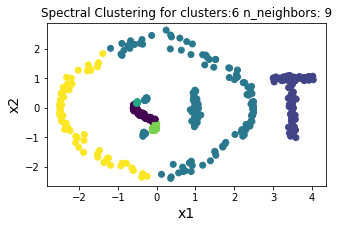

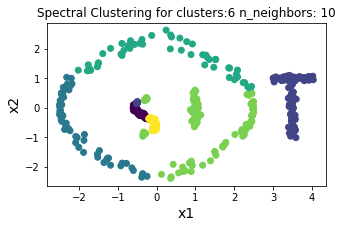

In [119]:
# do clustering for different values of n_clusters and n_neighbours with affinity 'nearest_neighbors'
n_vals = [3,4,5,6]
neighbors = np.arange(1,11)

for n in n_vals:
    for m in neighbors:
        # define spectral clustering model
        sc = SpectralClustering(n_clusters= n, affinity='nearest_neighbors',n_neighbors=m, random_state=10)
        # fit thee model
        sc_clusters = sc.fit(data)
        #cluster labels
        cluster_labels = sc_clusters.labels_
        
        # plot the clusters
        plt.figure(figsize=(5,3))
        plt.scatter(data.iloc[:,0], data.iloc[:,1], c=cluster_labels )
        plt.xlabel('x1', size=14)
        plt.ylabel('x2', size=14)
        plt.title(f'Spectral Clustering for clusters:{n} n_neighbors: {m}')
        plt.show()
     

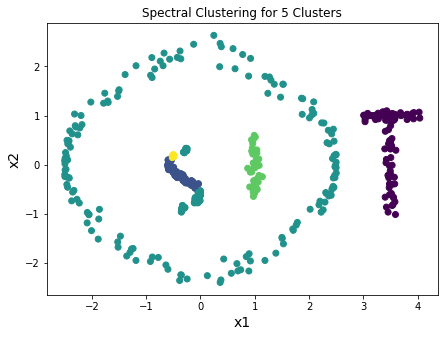

In [113]:
#from the above n_cluster =5 and n_neibours =9 gives a reasonable clusters with affinity 'nearest_neighbors'
# define spectral clustering model
sc = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',n_neighbors=9,random_state=10)
# fit thee model
sc_clusters = sc.fit(data)
#cluster labels
cluster_labels = sc_clusters.labels_

# plot the clusters
plt.figure(figsize=(7,5))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=cluster_labels )
plt.xlabel('x1', size=14)
plt.ylabel('x2', size=14)
plt.title('Spectral Clustering for 5 Clusters')
plt.show()

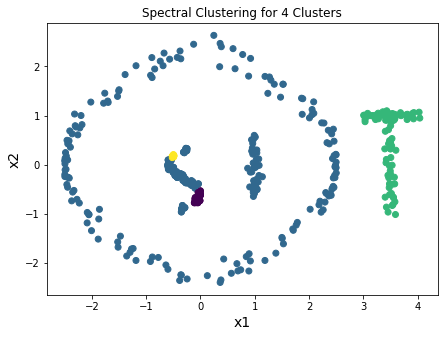

In [117]:
# cluatering for n-clusters =4 with other parameters same
# define spectral clustering model
sc = SpectralClustering(n_clusters=4, affinity='nearest_neighbors',n_neighbors=9, random_state=10)
# fit thee model
sc_clusters = sc.fit(data)
#cluster labels
cluster_labels = sc_clusters.labels_

# plot the clusters
plt.figure(figsize=(7,5))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=cluster_labels )
plt.xlabel('x1', size=14)
plt.ylabel('x2', size=14)
plt.title('Spectral Clustering for 4 Clusters')
plt.show()

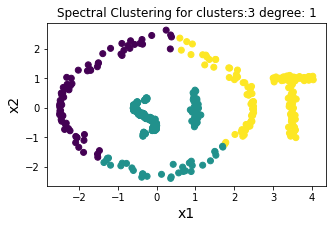

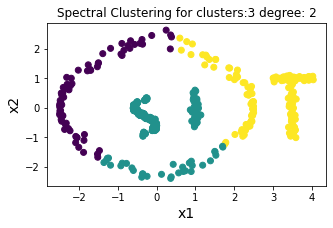

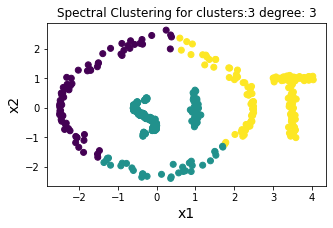

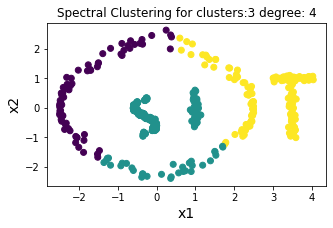

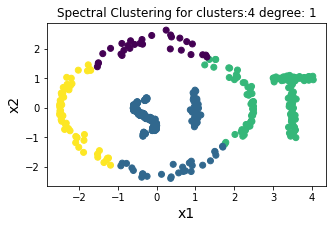

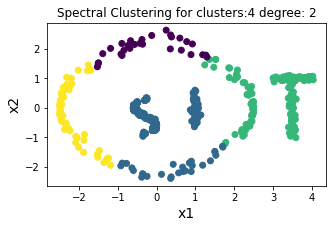

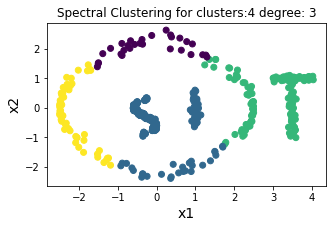

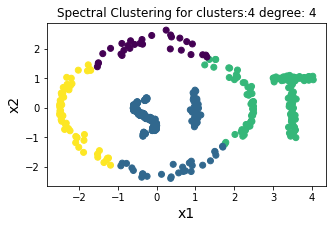

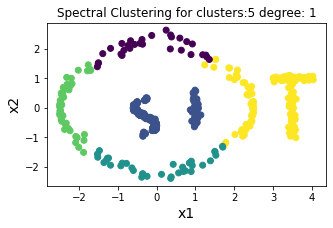

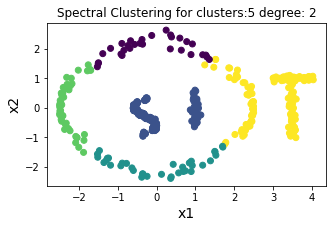

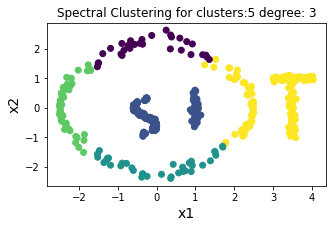

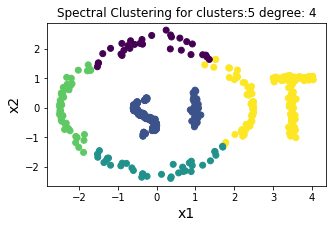

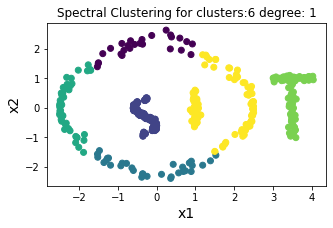

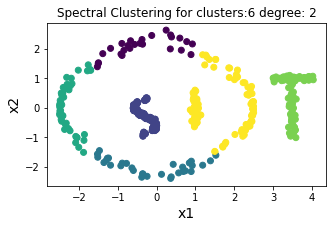

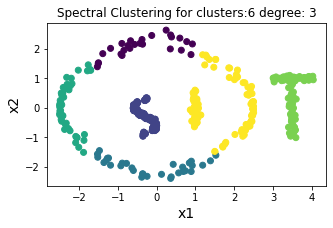

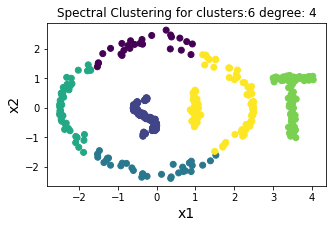

In [120]:
# do clustering for different values of n_clusters and degree with affinity 'rbf'
n_vals = [3,4,5,6]
degree = [1,2,3,4]

for n in n_vals:
    for m in degree:
        # define spectral clustering model
        sc = SpectralClustering(n_clusters= n, affinity='rbf', degree =m, gamma =2, random_state=10)
        # fit thee model
        sc_clusters = sc.fit(data)
        #cluster labels
        cluster_labels = sc_clusters.labels_
        
        # plot the clusters
        plt.figure(figsize=(5,3))
        plt.scatter(data.iloc[:,0], data.iloc[:,1], c=cluster_labels )
        plt.xlabel('x1', size=14)
        plt.ylabel('x2', size=14)
        plt.title(f'Spectral Clustering for clusters:{n} degree: {m}')
        plt.show()

In [ ]:
#there is no well seperated clusters foound